# Breast Cancer Project

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
import pandas as pd

In [0]:
# getting the dataset
data = load_breast_cancer()

In [157]:
# Description of the dataset
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
target_labels = data['target_names']
X = data['data']
y = data['target']

In [0]:
dfX = pd.DataFrame(X, columns=data['feature_names'])
dfy = pd.Series(y, name= 'target')

In [0]:
df = pd.concat([dfX, dfy], axis=1)

In [32]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [0]:
# Standerdizing the data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_std = std.fit_transform(X)

In [0]:
# train/test splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(X, y, test_size  = 0.2, random_state = 72)

In [56]:
# Dimentionality Reduction
from sklearn.decomposition import PCA
pca = PCA(30)
reduced = pca.fit_transform(X)
print("Explained Variance ", pca.explained_variance_ratio_)
pca = PCA(2)
reduced = pca.fit_transform(X)

Explained Variance  [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07 6.99473205e-08 1.65908880e-08
 6.99641650e-09 4.78318306e-09 2.93549214e-09 1.41684927e-09
 8.29577731e-10 5.20405883e-10 4.08463983e-10 3.63313378e-10
 1.72849737e-10 1.27487508e-10 7.72682973e-11 6.28357718e-11
 3.57302295e-11 2.76396041e-11 8.14452259e-12 6.30211541e-12
 4.43666945e-12 1.55344680e-12]


In [0]:
# train/test splitting of reduced data
from sklearn.model_selection import train_test_split
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(reduced, y, test_size  = 0.2, random_state = 72)

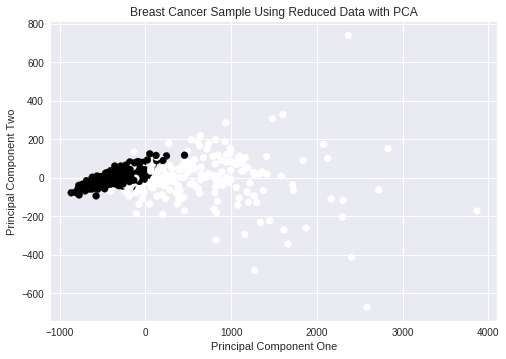

In [59]:
plt.scatter(reduced[:,0], reduced[:,1], c = y)
plt.xlabel("Principal Component One")
plt.ylabel("Principal Component Two")
plt.title("Breast Cancer Sample Using Reduced Data with PCA")
plt.show()

In [0]:
import seaborn as sns

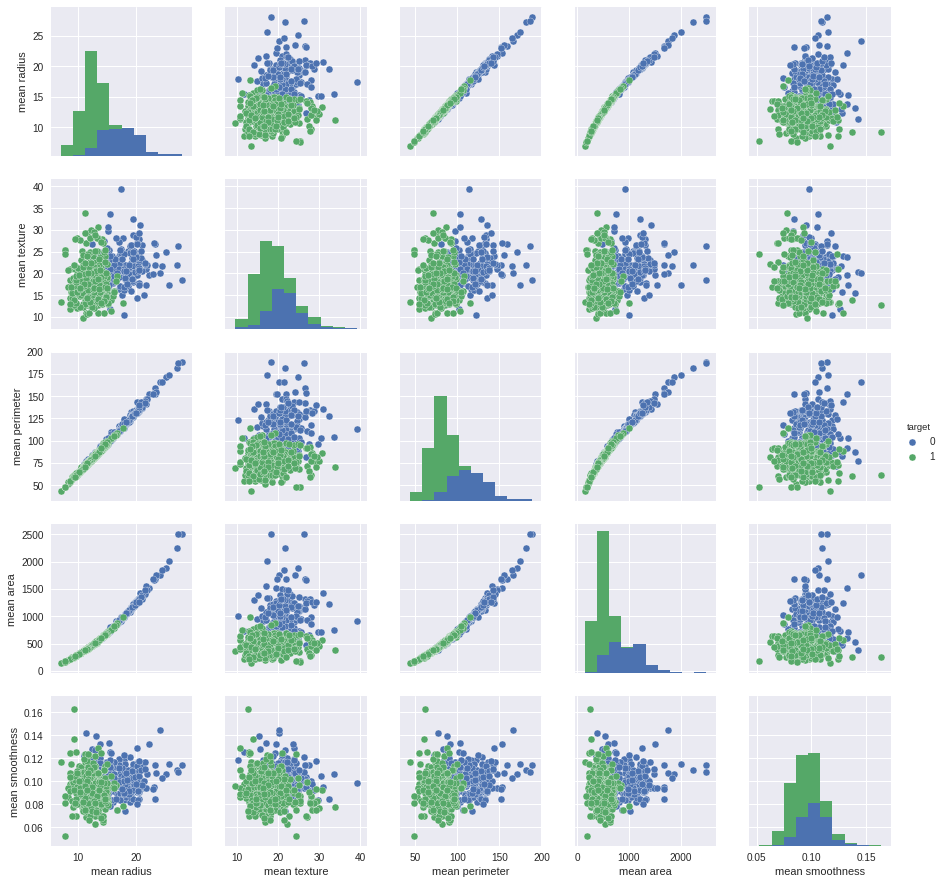

In [51]:
sns.pairplot(df,hue = 'target', vars = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness'])

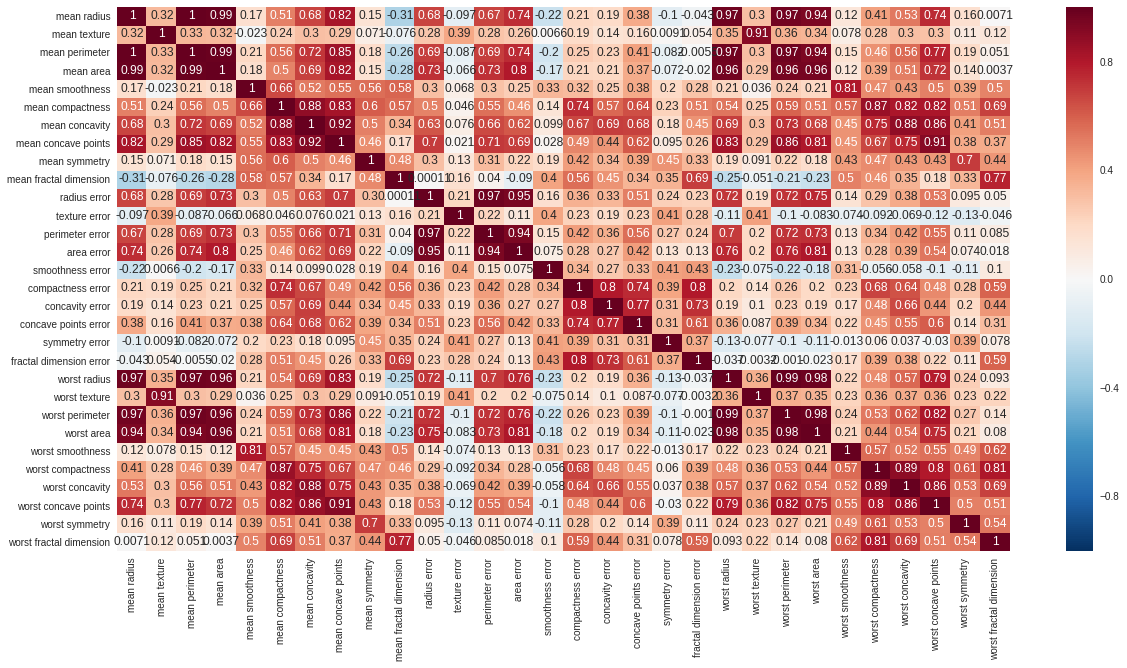

In [60]:
correlation = dfX.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation, annot = True)

# Model Building

In this section we gonna build 2 models, one using Support Vector Machine (SVM), and the other uses a deep neural network.

## SVM

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [75]:
classifier = SVC(kernel = 'rbf',random_state = 0 , gamma = 0.001 , C = 1000)
classifier.fit(x_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

Accuracy was: 0.9035087719298246 , and F-1 score of 0.920863309352518


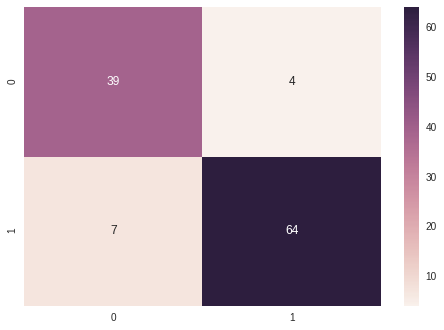

In [78]:
ypred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, ypred)
f1 = f1_score(y_test, ypred)
cm = confusion_matrix(y_test, ypred)
print('Accuracy was: {} , and F-1 score of {}'.format(accuracy, f1))
sns.heatmap(cm, annot=True)

In [0]:
# Search best paramater for SVM
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [0]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'gamma': [1e-3, 1e-4], 
                     'C': [1, 10, 100, 1000]}]
scores = ['precision_macro', 'recall_macro', 'accuracy']

In [87]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring = score)
    clf.fit(x_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision_macro

Best parameters set found on development set:

{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}

Grid scores on development set:

0.918 (+/-0.056) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.937 (+/-0.046) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.911 (+/-0.030) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.951 (+/-0.046) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.911 (+/-0.030) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.939 (+/-0.031) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.911 (+/-0.030) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.925 (+/-0.029) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.971 (+/-0.031) for {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
0.971 (+/-0.031) for {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.970 (+/-0.030) for {'C': 10, 'gamma': 0.001, 'kernel': 'linear'}
0.970 (+/-0.030) for {'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
0.963 (+/-0.020) for {'C': 100, 'gamma'

In [88]:
# Building the final model
final_cls = SVC(kernel = 'linear' , C = 1, gamma = 0.001)
final_cls.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Accuracy was: 0.9473684210526315 , and F-1 score of 0.9583333333333334


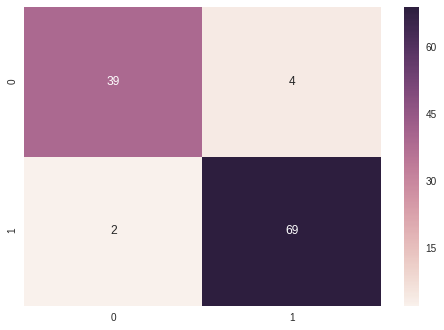

In [89]:
ypred = final_cls.predict(x_test)
accuracy = accuracy_score(y_test, ypred)
f1 = f1_score(y_test, ypred)
cm = confusion_matrix(y_test, ypred)
print('Accuracy was: {} , and F-1 score of {}'.format(accuracy, f1))
sns.heatmap(cm, annot=True)

## Deep Neural Network
in this section we wil develop a deep neura network using keras library to solve the breast cancer problem.

In [0]:
from keras.models import Sequential
from keras.layers import Dropout, Dense

In [0]:
from keras.utils import to_categorical
y_train_k, y_test_k = to_categorical(y_train), to_categorical(y_test)

In [144]:
model = Sequential()
model.add(Dense(1000, input_dim = 30, activation ='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1000, activation ='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1000, activation ='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 1000)              31000     
_________________________________________________________________
dropout_69 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_86 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_70 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_87 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_71 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_88 (Dense)             (None, 1)                 1001      
Total para

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [146]:
model.fit(x_train, y_train,  epochs = 100, batch_size = 32)

Epoch 1/100
455/455 [==============================] - 2s 4ms/step - loss: 5.6808 - acc: 0.5978
Epoch 2/100
455/455 [==============================] - 0s 303us/step - loss: 2.2443 - acc: 0.5692
Epoch 3/100
455/455 [==============================] - 0s 303us/step - loss: 0.9054 - acc: 0.5319
Epoch 4/100
455/455 [==============================] - 0s 329us/step - loss: 0.7021 - acc: 0.5758
Epoch 5/100
455/455 [==============================] - 0s 300us/step - loss: 0.6977 - acc: 0.6154
Epoch 6/100
455/455 [==============================] - 0s 310us/step - loss: 0.7179 - acc: 0.5692
Epoch 7/100
455/455 [==============================] - 0s 302us/step - loss: 0.7051 - acc: 0.5802
Epoch 8/100
455/455 [==============================] - 0s 315us/step - loss: 0.6672 - acc: 0.6286
Epoch 9/100
455/455 [==============================] - 0s 314us/step - loss: 0.5296 - acc: 0.7846
Epoch 10/100
455/455 [==============================] - 0s 304us/step - loss: 0.4692 - acc: 0.8044
Epoch 11/100
455/455 

In [147]:
# evaluation
score = model.evaluate(x_test, y_test, verbose = 0)
print("Accuracy was " , score[1])

Accuracy was  0.8859649080979196


In [0]:
ypred = np.round(model.predict(x_test))


In [154]:
ypred[0]

array([1.], dtype=float32)

Accuracy was: 0.8859649122807017 , and F-1 score of 0.9127516778523489


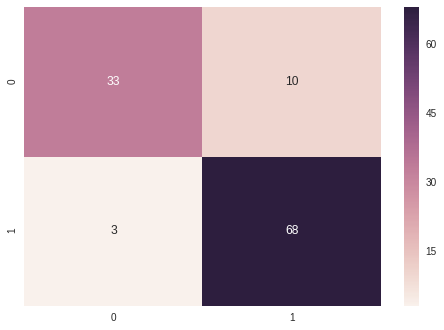

In [155]:
accuracy = accuracy_score(y_test, ypred)
f1 = f1_score(y_test, ypred)
cm = confusion_matrix(y_test, ypred)
print('Accuracy was: {} , and F-1 score of {}'.format(accuracy, f1))
sns.heatmap(cm, annot=True)

# And the winner is SVM